In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

In [3]:
df = yf.download('SQ', start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
df.std()

Open         7.268201e+01
High         7.391122e+01
Low          7.114361e+01
Close        7.244257e+01
Adj Close    7.244257e+01
Volume       6.793946e+06
dtype: float64

In [6]:
df['ma_20'] = df.Close.rolling(20).mean()
df['vol'] = df.Close.rolling(20).std()
df['upper_bb'] = df.ma_20 + (2 * df.vol)
df['lower_bb'] = df.ma_20 - (2 * df.vol)

<AxesSubplot: xlabel='Date'>

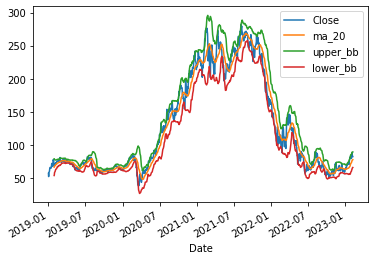

In [8]:
df[['Close','ma_20','upper_bb','lower_bb']].plot()

In [10]:
df['rsi'] = ta.momentum.rsi(df.Close, window=6)

In [11]:
conditions = [(df.rsi < 30) & (df.Close < df.lower_bb),
             (df.rsi > 70) & (df.Close > df.upper_bb)]

In [12]:
choices = ['Buy','Sell']

In [13]:
df['signal'] = np.select(conditions,choices)

In [15]:
df.dropna(inplace=True)

In [16]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2019-01-30,71.010002,71.599998,68.720001,71.529999,71.529999,18710400,66.659500,6.321133,79.301766,54.017234,53.228844,0
2019-01-31,70.029999,73.860001,69.980003,71.349998,71.349998,15679400,67.367000,5.989839,79.346678,55.387322,52.662931,0
2019-02-01,71.050003,71.279999,69.720001,70.800003,70.800003,12677800,68.286000,4.883736,78.053472,58.518528,50.687025,0
2019-02-04,71.000000,72.620003,70.400002,71.750000,71.750000,10582100,68.964500,4.315380,77.595259,60.333741,54.245314,0
2019-02-05,73.000000,75.169998,72.269997,72.279999,72.279999,19150500,69.542500,3.907931,77.358362,61.726637,56.353753,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,80.879997,82.320000,80.199997,81.720001,81.720001,8801900,74.145501,6.175963,86.497426,61.793575,64.238849,0
2023-02-01,82.070000,84.754997,80.059998,83.900002,83.900002,11087200,75.108501,6.117086,87.342674,62.874328,70.086422,0
2023-02-02,86.800003,89.970001,86.220001,88.410004,88.410004,13349900,76.214001,6.431231,89.076463,63.351539,78.723485,0


In [17]:
df.tail(50)

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2022-11-23,62.639999,64.260002,61.919998,63.919998,63.919998,8190000,63.311500,5.432718,74.176936,52.446064,46.410088,0
2022-11-25,63.990002,63.990002,62.508999,63.380001,63.380001,4168800,63.467500,5.385069,74.237638,52.697362,44.507780,0
2022-11-28,61.910000,63.830002,61.119999,61.369999,61.369999,7239900,63.471500,5.383396,74.238291,52.704708,37.620075,0
2022-11-29,62.070000,63.889999,61.730000,62.110001,62.110001,8219900,63.573500,5.334661,74.242821,52.904178,41.611976,0
2022-11-30,62.099998,68.000000,61.852001,67.769997,67.769997,14298600,64.012000,5.299263,74.610525,53.413474,63.216750,0
2022-12-01,68.019997,69.239998,66.660004,69.169998,69.169998,9430000,64.738499,4.929909,74.598317,54.878682,66.856850,0
2022-12-02,67.269997,68.940002,66.620003,68.180000,68.180000,7721100,65.451999,4.268501,73.989002,56.914997,61.677481,0
2022-12-05,67.400002,67.860001,62.400002,63.139999,63.139999,12610900,65.603499,4.120113,73.843725,57.363274,41.864356,0
2022-12-06,63.119999,63.879002,60.200001,61.299999,61.299999,9408900,65.534999,4.182370,73.899739,57.170260,36.699534,0


In [18]:
df.signal = df.signal.shift()

In [20]:
for index,row in df.iterrows():
    print(row)

Open         71.010002
High         71.599998
Low          68.720001
Close        71.529999
Adj Close    71.529999
Volume        18710400
ma_20          66.6595
vol           6.321133
upper_bb     79.301766
lower_bb     54.017234
rsi          53.228844
signal            None
Name: 2019-01-30 00:00:00, dtype: object
Open         70.029999
High         73.860001
Low          69.980003
Close        71.349998
Adj Close    71.349998
Volume        15679400
ma_20           67.367
vol           5.989839
upper_bb     79.346678
lower_bb     55.387322
rsi          52.662931
signal               0
Name: 2019-01-31 00:00:00, dtype: object
Open         71.050003
High         71.279999
Low          69.720001
Close        70.800003
Adj Close    70.800003
Volume        12677800
ma_20           68.286
vol           4.883736
upper_bb     78.053472
lower_bb     58.518528
rsi          50.687025
signal               0
Name: 2019-02-01 00:00:00, dtype: object
Open              71.0
High         72.620003
Low

Name: 2020-03-31 00:00:00, dtype: object
Open         49.779999
High         50.009998
Low          46.049999
Close        46.810001
Adj Close    46.810001
Volume        16596400
ma_20           53.101
vol          11.400964
upper_bb     75.902927
lower_bb     30.299073
rsi          39.307889
signal               0
Name: 2020-04-01 00:00:00, dtype: object
Open         46.330002
High         48.029999
Low               45.0
Close        45.880001
Adj Close    45.880001
Volume        12871500
ma_20           51.579
vol          10.095201
upper_bb     71.769402
lower_bb     31.388598
rsi          37.513278
signal               0
Name: 2020-04-02 00:00:00, dtype: object
Open             46.02
High             46.68
Low          42.330002
Close        43.720001
Adj Close    43.720001
Volume        18748600
ma_20          50.1105
vol           8.862279
upper_bb     67.835057
lower_bb     32.385943
rsi          33.278711
signal               0
Name: 2020-04-03 00:00:00, dtype: object
Open    

Name: 2021-04-26 00:00:00, dtype: object
Open         256.959991
High         260.809998
Low          253.399994
Close        253.789993
Adj Close    253.789993
Volume          6791500
ma_20        247.708499
vol           14.930441
upper_bb     277.569382
lower_bb     217.847617
rsi           57.735148
signal                0
Name: 2021-04-27 00:00:00, dtype: object
Open              253.0
High         258.970001
Low          249.399994
Close        254.199997
Adj Close    254.199997
Volume          6140700
ma_20        249.776999
vol           12.514202
upper_bb     274.805402
lower_bb     224.748596
rsi           58.496402
signal                0
Name: 2021-04-28 00:00:00, dtype: object
Open         257.358002
High         259.880005
Low          245.009995
Close        247.759995
Adj Close    247.759995
Volume          6592800
ma_20        250.812498
vol           11.336031
upper_bb      273.48456
lower_bb     228.140437
rsi           43.670578
signal                0
Name: 2021-04

Name: 2022-06-30 00:00:00, dtype: object
Open         61.950001
High         65.139999
Low          61.860001
Close        63.900002
Adj Close    63.900002
Volume        15218100
ma_20           68.497
vol           9.237463
upper_bb     86.971926
lower_bb     50.022073
rsi           44.63553
signal               0
Name: 2022-07-01 00:00:00, dtype: object
Open             61.84
High         66.910004
Low          60.349998
Close        66.730003
Adj Close    66.730003
Volume        14496500
ma_20          67.6785
vol            8.57708
upper_bb     84.832659
lower_bb      50.52434
rsi          53.737354
signal               0
Name: 2022-07-05 00:00:00, dtype: object
Open         66.599998
High         68.470001
Low          64.279999
Close        64.970001
Adj Close    64.970001
Volume        11788100
ma_20           66.758
vol           7.751442
upper_bb     82.260884
lower_bb     51.255116
rsi          47.864869
signal               0
Name: 2022-07-06 00:00:00, dtype: object
Open    

In [40]:
position =False
buydates,selldates = [],[]
buyprices,sellprices = [],[]

for index,row in df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydates.append(index)
        buyprices.append(row.Open)
        position = True
        
    if position:
        if row['signal'] == 'Sell' or row.shifted_Close < 0.98 * buyprices[-1]:
            selldates.append(index)
            sellprices.append(row.Open)
            position = False        
    
    

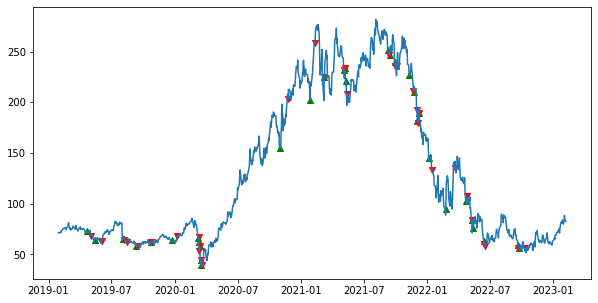

In [41]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker='^', c='g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker='v', c='r')

In [42]:
(pd.Series([(sell - buy) / buy for sell,buy in zip(sellprices,buyprices)]) + 1).prod() - 1

0.14947894559245345

In [31]:
df['shifted_Close'] = df.Close.shift()